In [1]:
import cnn
from cnn import layers
from cnn import activations
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

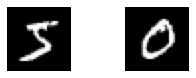

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.array(X_train)
X_train = np.pad(X_train, ((0, 0), (2, 2), (2, 2)), 'constant').tolist()

for i in range(2):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')

for i in range(len(X_train)):
    for j in range(len(X_train[i])):
        for k in range(len(X_train[i][j])):
            X_train[i][j][k] /= 255

X_train = list(map(lambda x: [x], X_train))


In [4]:
lenet5 = cnn.Sequential()

lenet5.add(layers.Conv2D(6, (5, 5), activation=activations.ReLU,input_shape=(32, 32, 1)))
lenet5.add(layers.Pooling(pool_mode="max"))
lenet5.add(layers.Flatten())
lenet5.add(layers.Dense(120, activation=activations.ReLU))
lenet5.add(layers.Dense(84, activation=activations.ReLU))
lenet5.add(layers.Dense(10, activation=activations.Softmax))

lenet5.summary()

lenet5.fit(X_train[:20], y_train[:20], epochs=3)


Model: Sequential
Layer (type)                       Output Shape                       Param #       
conv2d_1 (Conv2D)                  (None, 28, 28, 6)                  156              
--------------------------------------------------------------------------------
pooling_1 (Pooling)                (None, 14, 14, 6)                  0                
--------------------------------------------------------------------------------
flatten_1 (Flatten)                (None, 1176)                       0                
--------------------------------------------------------------------------------
dense_1 (Dense)                    (None, 120)                        141240           
--------------------------------------------------------------------------------
dense_2 (Dense)                    (None, 84)                         10164            
--------------------------------------------------------------------------------
dense_3 (Dense)                    (None, 10)      

In [5]:
lenet5.save_model("saved.p")

Model saved successfully!


In [6]:
load = cnn.Sequential()
new = load.load_model("saved.p")

new.summary()


Model loaded successfully!

Model: Sequential
Layer (type)                       Output Shape                       Param #       
conv2d_1 (Conv2D)                  (None, 28, 28, 6)                  156              
--------------------------------------------------------------------------------
pooling_1 (Pooling)                (None, 14, 14, 6)                  0                
--------------------------------------------------------------------------------
flatten_1 (Flatten)                (None, 1176)                       0                
--------------------------------------------------------------------------------
dense_1 (Dense)                    (None, 120)                        141240           
--------------------------------------------------------------------------------
dense_2 (Dense)                    (None, 84)                         10164            
--------------------------------------------------------------------------------
dense_3 (Dense)         

In [7]:
import pandas as pd

In [8]:
!pip install idx2numpy

In [9]:
import idx2numpy

In [10]:
arr = idx2numpy.convert_from_file("t10k-images.idx3-ubyte")

In [11]:
print(arr.shape)

(10000, 28, 28)


In [ ]:
X = np.pad(arr, ((0, 0), (2, 2), (2, 2)), 'constant').tolist()

for i in range(len(X)):
    for j in range(len(X[i])):
        for k in range(len(X[i][j])):
            X[i][j][k] /= 255

X_train = list(map(lambda x: [x], X_train))